In [58]:
%load_ext autoreload
%autoreload 2

from glob import glob
import pandas as pd
import os
import json


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
new_csvs = glob("../plot_inputs/*.csv")
new_csvs

['../plot_inputs/turbo_lte.2022_09_22_03_30_15.66ve.csv',
 '../plot_inputs/turboae_exact_nonsys_bd_window5_delay0.2022_09_22_06_24_20.gxk5.csv',
 '../plot_inputs/turboae_exact_nonsys_bd_window5_delay2.2022_09_22_06_03_53.724j.csv',
 '../plot_inputs/turboae_approximated_rsc_nobd_window5.2022_09_22_17_58_14.1x2x.csv',
 '../plot_inputs/turboae_approximated_rsc_nobd_window5.2022_09_22_12_26_14.nw7o.csv',
 '../plot_inputs/turboae_exact_rsc_nobd_window5.2022_09_22_16_56_40.ze82.csv',
 '../plot_inputs/turboae_approximated_nonsys_nobd_window5_delay0.2022_09_22_10_12_02.qbn8.csv',
 '../plot_inputs/turboae_exact_nonsys_nobd_window5_delay2.2022_09_22_06_44_31.xitn.csv',
 '../plot_inputs/turboae_approximated_encoder_decoder_finetune.csv',
 '../plot_inputs/turboae_approximated_bd_decoder_finetune.csv',
 '../plot_inputs/turbo_155_7.2022_09_22_01_13_52.12mg.csv',
 '../plot_inputs/turboae_exact_nonsys_nobd_window5_delay0.2022_09_22_07_05_26.2ij6.csv',
 '../plot_inputs/turbo_lte.2022_09_22_13_58_20.t4d

In [60]:
new_csvs = [
    '../plot_inputs/turbo_lte.2022_09_22_03_30_15.66ve.csv',    
    # # '../plot_inputs/turboae_exact_nonsys_bd_window5_delay0.2022_09_22_06_24_20.gxk5.csv',
    # # '../plot_inputs/turboae_exact_nonsys_bd_window5_delay2.2022_09_22_06_03_53.724j.csv',
    '../plot_inputs/turboae_approximated_rsc_nobd_window5.2022_09_22_12_26_14.nw7o.csv',
    '../plot_inputs/turboae_exact_rsc_nobd_window5.2022_09_22_16_56_40.ze82.csv',
    # '../plot_inputs/turboae_approximated_nonsys_nobd_window5_delay0.2022_09_22_10_12_02.qbn8.csv',
    # # '../plot_inputs/turboae_exact_nonsys_nobd_window5_delay2.2022_09_22_06_44_31.xitn.csv',
    '../plot_inputs/turboae_approximated_encoder_decoder_finetune.csv',
    '../plot_inputs/turboae_approximated_bd_decoder_finetune.csv',
    '../plot_inputs/turbo_155_7.2022_09_22_01_13_52.12mg.csv',
    # '../plot_inputs/turboae_exact_nonsys_nobd_window5_delay0.2022_09_22_07_05_26.2ij6.csv',
    '../plot_inputs/turboae_exact_encoder_decoder_finetune.csv',
    '../plot_inputs/turboae_exact_encoder_decoder_scratch.csv',
    # # '../plot_inputs/turboae_approximated_nonsys_nobd_window5_delay2.2022_09_22_09_59_58.rqa8.csv'
]
results = pd.concat([pd.read_csv(c) for c in new_csvs], axis=0)
results["model_name"] = results["model_id"].apply(lambda s: s.split('.')[0])
def extract_tf_tensor(s):
    if isinstance(s, str) and "tf.Tensor" in s:
        s = s.split(',')[0]
        s = s[len("tf.Tensor("):]
        return float(s)
    return s
results = results.applymap(extract_tf_tensor)

In [61]:
results

,model_id,snr,channel,encoder,decoder,constraint,dataset,num_batches,block_len,batch_size,...,hazzys_turbo_decoder__decoder1_init_kl_divergence_iter4__std_confidence,hazzys_turbo_decoder__decoder1_init_kl_divergence_iter5__std_confidence,hazzys_turbo_decoder__decoder2_init_kl_divergence_iter0__std_confidence,hazzys_turbo_decoder__decoder2_init_kl_divergence_iter1__std_confidence,hazzys_turbo_decoder__decoder2_init_kl_divergence_iter2__std_confidence,hazzys_turbo_decoder__decoder2_init_kl_divergence_iter3__std_confidence,hazzys_turbo_decoder__decoder2_init_kl_divergence_iter4__std_confidence,hazzys_turbo_decoder__decoder2_init_kl_divergence_iter5__std_confidence,name,model_name
0,turbo_lte.2022_09_22_03_30_15.ec4w,-3.0,awgn,turbo_encoder,hazzys_turbo_decoder,scale_constraint,binary_messages,200.0,100.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,turbo_lte
1,turbo_lte.2022_09_22_03_30_15.618k,-2.5,awgn,turbo_encoder,hazzys_turbo_decoder,scale_constraint,binary_messages,200.0,100.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,turbo_lte
2,turbo_lte.2022_09_22_03_30_15.8l8v,-2.0,awgn,turbo_encoder,hazzys_turbo_decoder,scale_constraint,binary_messages,200.0,100.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,turbo_lte
3,turbo_lte.2022_09_22_03_30_15.hcc7,-1.5,awgn,turbo_encoder,hazzys_turbo_decoder,scale_constraint,binary_messages,200.0,100.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,turbo_lte
4,turbo_lte.2022_09_22_03_30_15.1f8u,-1.0,awgn,turbo_encoder,hazzys_turbo_decoder,scale_constraint,binary_messages,200.0,100.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,turbo_lte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,turboae_exact_encoder_decoder_scratch,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,turboae_exact_encoder_decoder_scratch
9,turboae_exact_encoder_decoder_scratch,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,turboae_exact_encoder_decoder_scratch
10,turboae_exact_encoder_decoder_scratch,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,turboae_exact_encoder_decoder_scratch
11,turboae_exact_encoder_decoder_scratch,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,turboae_exact_encoder_decoder_scratch


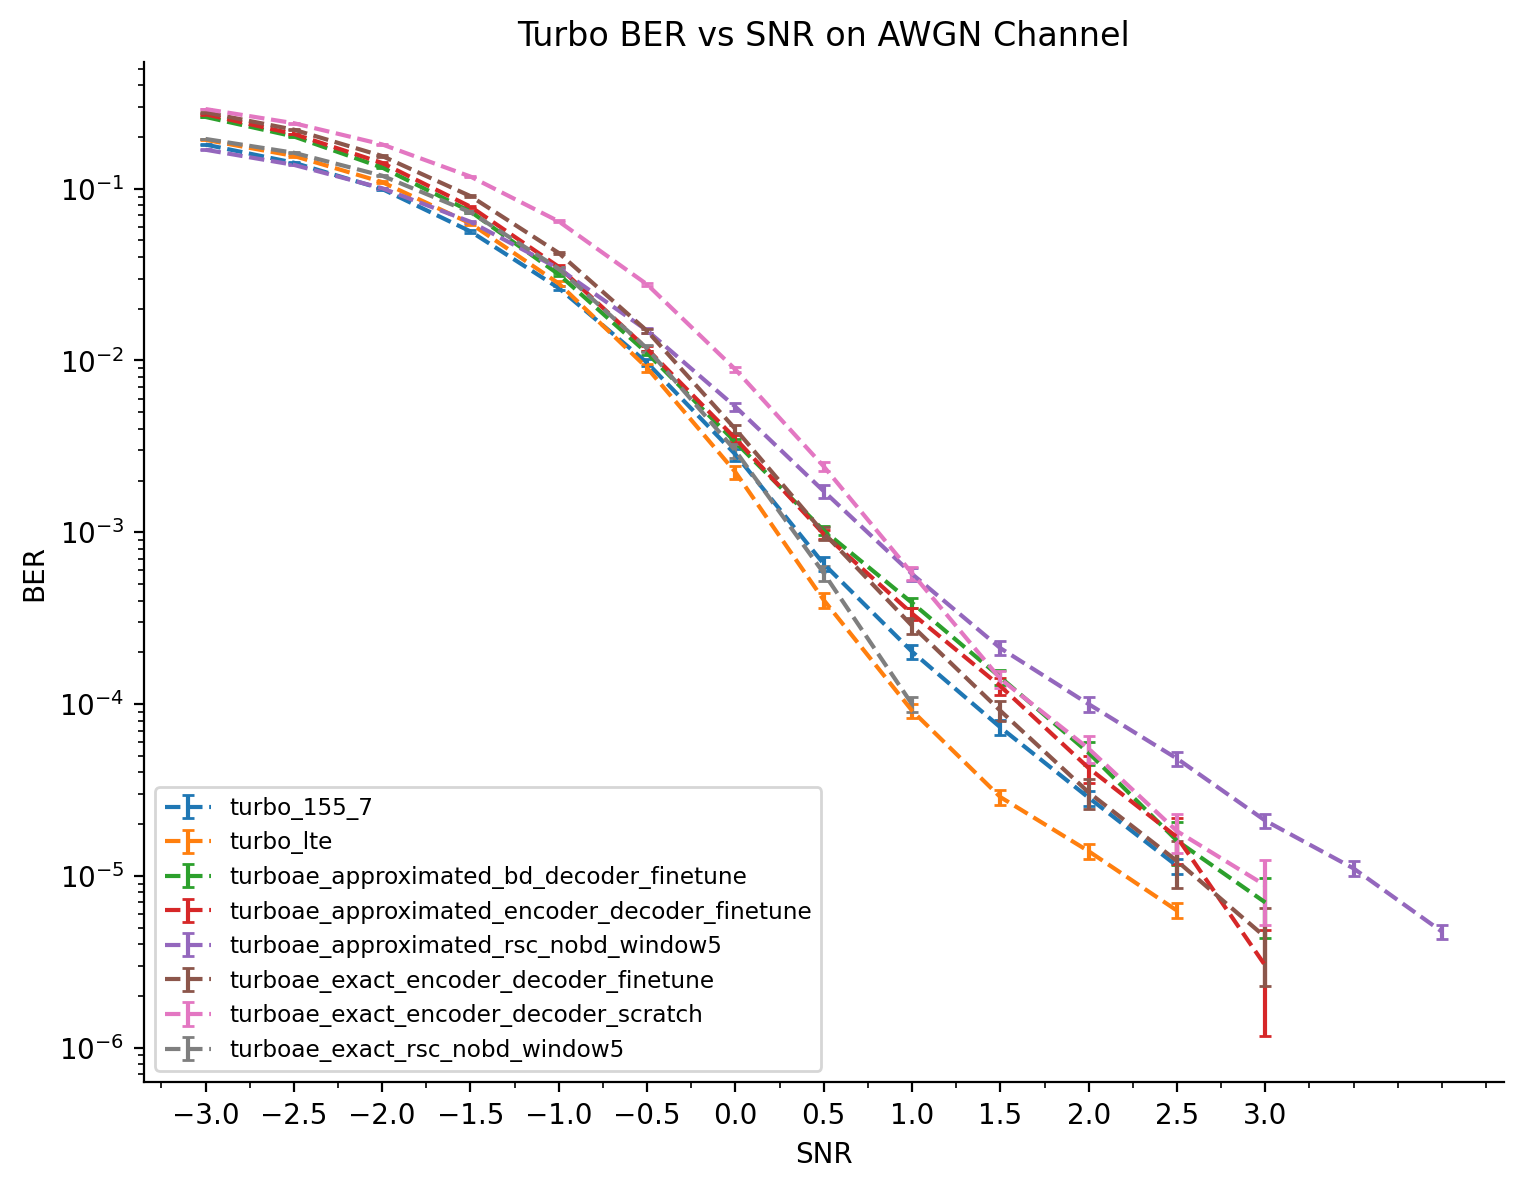

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure(figsize=(8, 6), dpi=200)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

def plot_ber(
    df,
    axes, 
    hide_top=True, 
    hide_right=True, 
    axes_titles=True,
    sci_ylabels=False,
    yticks_in=False,
    xticks_in=False
):
    axes.spines['right'].set_visible(not hide_right)
    axes.spines['top'].set_visible(not hide_top)
    axes.set_yscale('log')
    axes.xaxis.set_minor_locator(AutoMinorLocator(2))
    if axes_titles:
        axes.set_xlabel('SNR')
        axes.set_ylabel('BER')
    
    axes.set_xticks(np.arange(-3.0, 3.5, 0.5))
    
    if sci_ylabels:
        # form = axes.yaxis.get_major_formatter()
        # print(form)
        # form.minor_thresholds = (1, 1)
        # form.label_minor(True)
        # print(form.labelOnlyBase)
        logfmt = mpl.ticker.LogFormatterSciNotation(base=10.0, labelOnlyBase=True)
        axes.yaxis.set_major_formatter(logfmt)
        axes.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
        # axes.ticklabel_format(style='sci', axis='y')
        # axes.set_yticklabels([1e-5])
    if yticks_in:
        axes.tick_params(axis="y",direction="in", pad=-30, which='both')
    if xticks_in:
        axes.tick_params(axis="x",direction="in", pad=-13, which='both')
    
    for name, group in df.groupby("model_name"):
        l = axes.errorbar(
        group["snr"], 
        group["ber__mean"], 
        yerr=group["ber__std_confidence"] * 2, 
        linestyle='--',
        capsize=capsize,
        label=name
    )

plot_ber(results, ax)
ax.set_title('Turbo BER vs SNR on AWGN Channel')
ax.legend(loc='lower left', fontsize='small')
plt.show()

